In [11]:
# Import libraries
import glob
import csv
import math as math
from pathlib import Path
from natsort import natsorted

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from lmfit import Model
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from scipy.interpolate import make_interp_spline
from scipy import interpolate

from functions import fitProfile, fitProfile2
from functions import gaussian, line, gauss1, gauss1_new, gauss3
from functions import csv_to_df_list, plotFit, plotParameters


In [12]:
# Options fot the type of fitting: fit data from a single embryo or multiple embryos
fitting_type = ['SINGLE EMBRYO','MULTIPLE EMBRYOS']
fitting_method = ['curve_fit','lmfit']
profile_type = ['NMY-2','RhoA(AHPH)',"MLC-4AA"]
condition = ["all","one"] # this may need to change or add more as we test more conditions
plot_parameters = ["individual profiles","pooled profiles"]

In [13]:
root = '.'
results = root + '/Results/'
plots = results + '/Plots/'

Path(results).mkdir(parents=True, exist_ok=True)
Path(plots).mkdir(parents=True, exist_ok=True)


path = './data/nmy2RNAi_timecourse/controls'
csv_files = glob.glob(path + "/*.csv")

BIN THE RAW PROFILES 
only run this if you haven't got a file per movie already and instead, you have a bunch of files, one for each timepoint with position along the membrane and the correspondent fluorescence intensity

In [14]:
'''# Get CSV files list from a folder
#path = '/Users/joanaleite/Desktop/RhoA profiles - MG617/JL_26062019_MG617_ctrl_2'
path = '/Users/joanaleite/Desktop/GCP179/JL_04082022_gcp812'
csv_files = glob.glob(path + "/*.csv")

# create empty list
dataframes_list = csv_to_df_list(csv_files)

df = pd.DataFrame()
for dataframe in dataframes_list:
    #dataframe["Bins"] = pd.cut(dataframe['X'], 40)
    dataframe["Bins"] = pd.cut(dataframe['Distance_(microns)'], 40)
    #dataframe = dataframe["Y"].groupby(dataframe["Bins"]).agg(['mean'])
    dataframe = dataframe["Gray_Value"].groupby(dataframe["Bins"]).agg(['mean'])
    dataframe=dataframe.reset_index(drop=True)
    #print(dataframe['mean'])
    df= df.append(dataframe['mean'], ignore_index=True)

filename_profile = "./data/nmy2RNAi_timecourse/controls/JL_04082022_gcp812.csv"
df.to_csv(filename_profile, index=False, header=False)'''

'# Get CSV files list from a folder\n#path = \'/Users/joanaleite/Desktop/RhoA profiles - MG617/JL_26062019_MG617_ctrl_2\'\npath = \'/Users/joanaleite/Desktop/GCP179/JL_04082022_gcp812\'\ncsv_files = glob.glob(path + "/*.csv")\n\n# create empty list\ndataframes_list = csv_to_df_list(csv_files)\n\ndf = pd.DataFrame()\nfor dataframe in dataframes_list:\n    #dataframe["Bins"] = pd.cut(dataframe[\'X\'], 40)\n    dataframe["Bins"] = pd.cut(dataframe[\'Distance_(microns)\'], 40)\n    #dataframe = dataframe["Y"].groupby(dataframe["Bins"]).agg([\'mean\'])\n    dataframe = dataframe["Gray_Value"].groupby(dataframe["Bins"]).agg([\'mean\'])\n    dataframe=dataframe.reset_index(drop=True)\n    #print(dataframe[\'mean\'])\n    df= df.append(dataframe[\'mean\'], ignore_index=True)\n\nfilename_profile = "./data/nmy2RNAi_timecourse/controls/JL_04082022_gcp812.csv"\ndf.to_csv(filename_profile, index=False, header=False)'

PLOT RAW PROFILE

In [15]:
'''df.T.plot(legend=None, figsize=(10,6))
plt.title("NMY-2::GFP line profiles for each timepoint",fontsize=15) #RhoA(AHPH)::GFP line profiles for each timepoint"
plt.xlabel("Membrane length (s/L) (%)",fontsize=15)
plt.ylabel("NMY-2::GFP \n fluorescence intensity (AU)",fontsize=15) #RhoA(AHPH)::GFP \n fluorescence intensity (AU)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0,12000)
#plt.savefig("/Users/joanaleite/Documents/Leiteetal2022_figures/raw_profile_JL_04022022_gcp110xgcp971_mlc4RNAi20h_2.png")'''

'df.T.plot(legend=None, figsize=(10,6))\nplt.title("NMY-2::GFP line profiles for each timepoint",fontsize=15) #RhoA(AHPH)::GFP line profiles for each timepoint"\nplt.xlabel("Membrane length (s/L) (%)",fontsize=15)\nplt.ylabel("NMY-2::GFP \n fluorescence intensity (AU)",fontsize=15) #RhoA(AHPH)::GFP \n fluorescence intensity (AU)\nplt.xticks(fontsize=15)\nplt.yticks(fontsize=15)\nplt.ylim(0,12000)\n#plt.savefig("/Users/joanaleite/Documents/Leiteetal2022_figures/raw_profile_JL_04022022_gcp110xgcp971_mlc4RNAi20h_2.png")'

Using CURVE_FIT method (DO NOT USE FOR NOW, lmfit yields the possibility of a composite model and seems to provide better fits!)

In [16]:
'''A, B, C, D, E = fitProfile(df,gauss1_new)
parameters_df=pd.DataFrame()
parameters_df["Amplitude"] = A
parameters_df["mean"] = B
parameters_df["sigma"] = C
parameters_df["slope"] = D
parameters_df["const_offset"] = E

parameters_df["sigma"] = abs(parameters_df["sigma"])
my_value_sig = np.array(parameters_df["sigma"].values.tolist())
parameters_df["sigma"] = np.where(my_value_sig > 20,5, my_value_sig).tolist()

filename = "/Users/joanaleite/Desktop/MLC4AA_profiles/parameters_profiles/JL_04022022_gcp110xgcp971_1.csv"
parameters_df.to_csv(filename, index=False, header=True)'''

'A, B, C, D, E = fitProfile(df,gauss1_new)\nparameters_df=pd.DataFrame()\nparameters_df["Amplitude"] = A\nparameters_df["mean"] = B\nparameters_df["sigma"] = C\nparameters_df["slope"] = D\nparameters_df["const_offset"] = E\n\nparameters_df["sigma"] = abs(parameters_df["sigma"])\nmy_value_sig = np.array(parameters_df["sigma"].values.tolist())\nparameters_df["sigma"] = np.where(my_value_sig > 20,5, my_value_sig).tolist()\n\nfilename = "/Users/joanaleite/Desktop/MLC4AA_profiles/parameters_profiles/JL_04022022_gcp110xgcp971_1.csv"\nparameters_df.to_csv(filename, index=False, header=True)'

USING LMFIT METHOD FOR FITTING

In [17]:
fitting_type = "MULTIPLE EMBRYOS"
model = Model(gauss3) + Model(line) # Produce composite model: gaussian + linear regression

PERFORM PROFILE FITTING
it is possible to fit data from a single embryo or alternatively, data pooled from multiple embryos
the dataframe to provide as input varies, check function definition for details

In [18]:

if fitting_type == "MULTIPLE EMBRYOS":
    df_embryos_list, name_df_embryos_list = csv_to_df_list(csv_files)
    new_df = pd.concat([df for df in df_embryos_list], axis=0)
    new_df.index.name = 'Time'
    new_new_df = new_df.groupby('Time').agg(list)
    new_new_df_transp = new_new_df.T
    '''for col in new_new_df_transp.columns:
           fig, ax = plt.subplots()
           for x, y_array in new_new_df_transp[col].iteritems():
                ax.plot([x] * len(y_array), y_array, '.')'''

    best_parameters = fitProfile2(new_new_df_transp,model,fitting = fitting_type, plot=False)
    
    parameters_names = ['slope', 'intercept', 'amp','cen','wid']
    with open(r'./Results/results_best_parameters.csv', 'w') as outfile:
        writer = csv.DictWriter(outfile, parameters_names , delimiter=',')
        writer.writeheader()
        for i in best_parameters:
            writer.writerow(i)

        
elif fitting_type == "SINGLE EMBRYO":

    best_parameters = fitProfile2(df,model,fitting = fitting_type,plot=True)
    parameters_names = ['slope', 'intercept', 'amp','cen','wid']
    with open(r'./Results/results_best_parameters.csv', 'w') as outfile:
        writer = csv.DictWriter(outfile, parameters_names , delimiter=',')
        writer.writeheader()
        for i in best_parameters:
            writer.writerow(i)  

PLOT THE FIT FOR EVERY TIMEPOINT (using a continuous variable to produce a continuous gaussian)

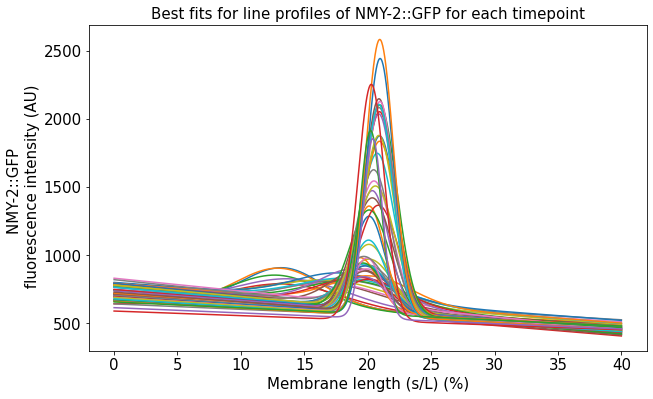

In [19]:
parameters_df = pd.read_csv("./Results/results_best_parameters.csv")
plot_filename = "control"
plotFit(new_new_df, parameters_df, model, plot_filename,fitting_method = "lmfit", profile_type = "NMY-2")

PLOT THE PARAMETERS OVER TIME: SLOPE, INTERCEPT, AMPLITUDE, CENTRE/MEAN, WIDTH/SIGMA

In [20]:
path_parameter_files = "./Results/"
csv_files_parameters = glob.glob(path_parameter_files + "/*.csv")

In [21]:
# create empty list
dfs_list, name_dfs_list = csv_to_df_list(csv_files_parameters)

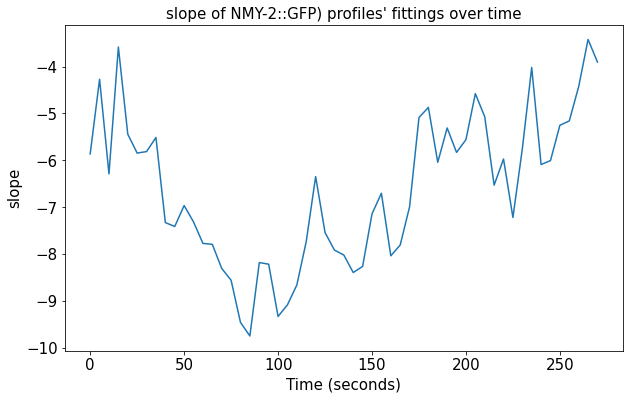

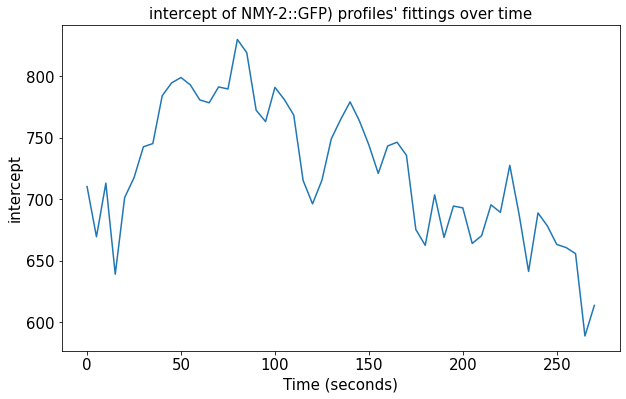

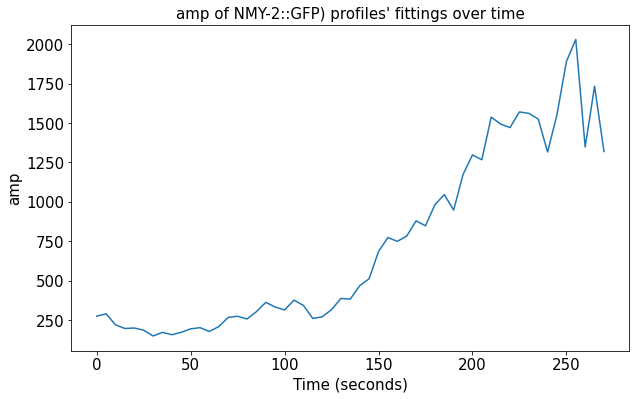

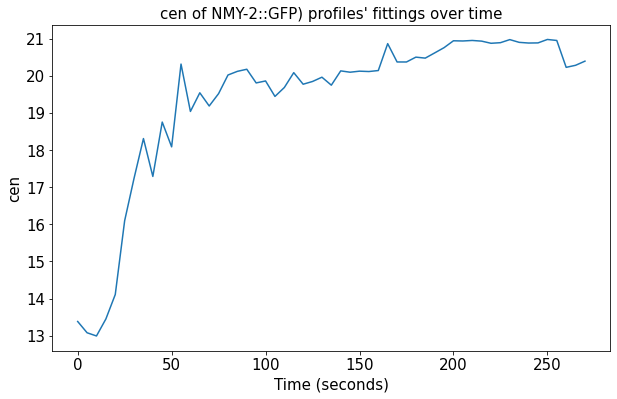

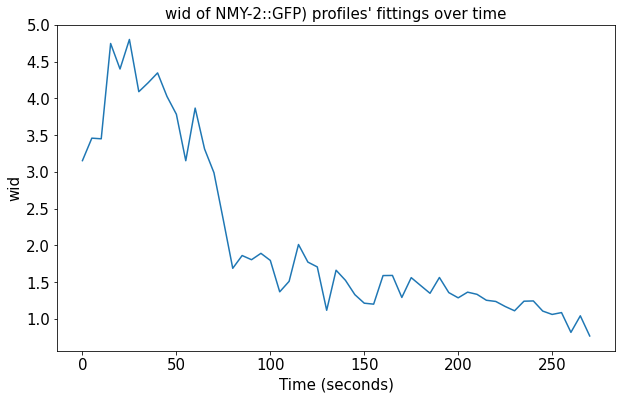

In [22]:
plotParameters(dfs_list,profile_type="NMY-2",condition="one condition",filename="Controls",plot="pooled profiles")